In [32]:
pip install tpot


In [33]:
# importing the packages we will be using for this project
import pandas as pd
# setting pandas display to avoid scientific notation in my dataframes
pd.options.display.float_format = '{:.3f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, Binarizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve,ConfusionMatrixDisplay, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import SelectPercentile
from tpot import TPOTClassifier
import xgboost
import eli5
%matplotlib inline


ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\Danvanth\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\metaestimators.py)

In [34]:
# reading the csv file
df = pd.read_csv('fetal_health.csv')
# previewing the DataFrame
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.000,0.000,0.000,0.000,0.000,73,0.500,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.000,0.006,0.003,0.000,0.000,17,2.100,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.000,0.008,0.003,0.000,0.000,16,2.100,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.000,0.008,0.003,0.000,0.000,16,2.400,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.000,0.008,0.000,0.000,0.000,16,2.400,0,...,53,170,9,0,137,136,138,11,1,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

In [36]:
df.shape


(2126, 22)

In [37]:
df.describe()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,...,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000
mean,133.304,0.003,0.009,0.004,0.002,0.000,0.000,46.990,1.333,9.847,...,93.579,164.025,4.068,0.324,137.452,134.611,138.090,18.808,0.320,1.304
std,9.841,0.004,0.047,0.003,0.003,0.000,0.001,17.193,0.883,18.397,...,29.560,17.944,2.949,0.706,16.381,15.594,14.467,28.978,0.611,0.614
min,106.000,0.000,0.000,0.000,0.000,0.000,0.000,12.000,0.200,0.000,...,50.000,122.000,0.000,0.000,60.000,73.000,77.000,0.000,-1.000,1.000
25%,126.000,0.000,0.000,0.002,0.000,0.000,0.000,32.000,0.700,0.000,...,67.000,152.000,2.000,0.000,129.000,125.000,129.000,2.000,0.000,1.000
50%,133.000,0.002,0.000,0.004,0.000,0.000,0.000,49.000,1.200,0.000,...,93.000,162.000,3.000,0.000,139.000,136.000,139.000,7.000,0.000,1.000
75%,140.000,0.006,0.003,0.007,0.003,0.000,0.000,61.000,1.700,11.000,...,120.000,174.000,6.000,0.000,148.000,145.000,148.000,24.000,1.000,1.000
max,160.000,0.019,0.481,0.015,0.015,0.001,0.005,87.000,7.000,91.000,...,159.000,238.000,18.000,10.000,187.000,182.000,186.000,269.000,1.000,3.000


In [38]:
# getting value counts for fetal accelerations column
df.accelerations.value_counts().sort_index()

accelerations
0.000    894
0.001    143
0.002    160
0.003    161
0.004    117
0.005    110
0.006    112
0.007     91
0.008    103
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: count, dtype: int64

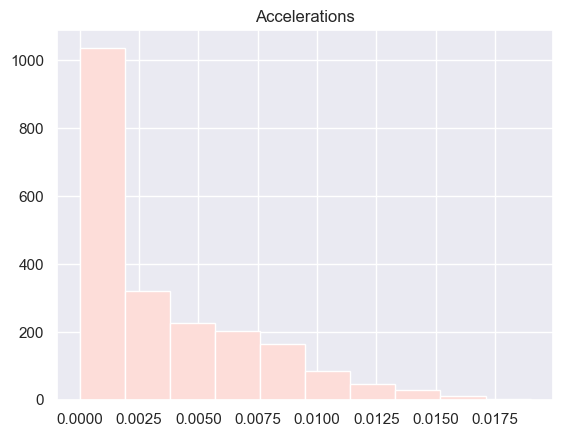

In [39]:
# plotting acceleration frequencies
sns.set_palette(palette='RdPu')
df.accelerations.hist()
plt.title('Accelerations');

In [40]:
# getting value counts for fetal movement column
df.fetal_movement.value_counts()

fetal_movement
0.000    1311
0.001     164
0.002     112
0.003      88
0.004      49
         ... 
0.079       1
0.109       1
0.103       1
0.031       1
0.099       1
Name: count, Length: 102, dtype: int64

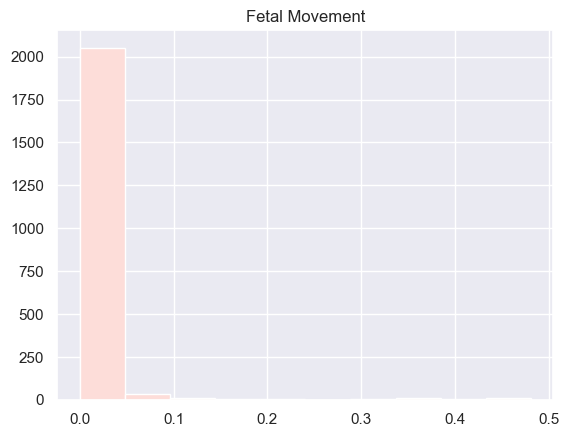

In [41]:
# plotting fetal movement frequencies
df.fetal_movement.hist()
plt.title('Fetal Movement');


In [42]:
 df.severe_decelerations.value_counts()
    

severe_decelerations
0.000    2119
0.001       7
Name: count, dtype: int64

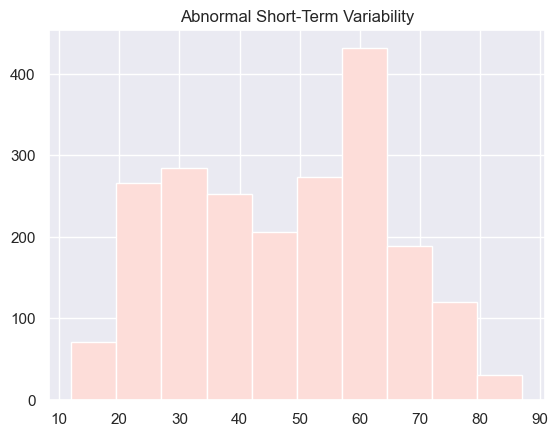

In [43]:
 df.abnormal_short_term_variability.hist()
plt.title('Abnormal Short-Term Variability');

In [44]:
df.histogram_width.describe()

count   2126.000
mean      70.446
std       38.956
min        3.000
25%       37.000
50%       67.500
75%      100.000
max      180.000
Name: histogram_width, dtype: float64

In [45]:
df.histogram_min.describe()

count   2126.000
mean      93.579
std       29.560
min       50.000
25%       67.000
50%       93.000
75%      120.000
max      159.000
Name: histogram_min, dtype: float64

In [46]:
 df.corr()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000,-0.081,-0.033,-0.146,-0.159,-0.054,-0.105,0.306,-0.280,0.286,...,0.362,0.275,-0.114,-0.005,0.709,0.723,0.789,-0.134,0.294,0.148
accelerations,-0.081,1.000,0.048,0.090,-0.109,-0.043,-0.128,-0.280,0.207,-0.374,...,-0.154,0.394,0.190,-0.006,0.244,0.270,0.273,0.126,0.028,-0.364
fetal_movement,-0.033,0.048,1.000,-0.069,0.049,-0.011,0.266,-0.104,0.121,-0.074,...,-0.154,0.100,0.165,-0.018,-0.061,-0.090,-0.072,0.179,-0.002,0.088
uterine_contractions,-0.146,0.090,-0.069,1.000,0.285,0.007,0.077,-0.233,0.290,-0.307,...,-0.113,0.123,0.083,0.058,-0.105,-0.188,-0.140,0.239,-0.072,-0.205
light_decelerations,-0.159,-0.109,0.049,0.285,1.000,0.108,0.226,-0.119,0.562,-0.271,...,-0.554,0.218,0.398,0.235,-0.347,-0.527,-0.389,0.564,0.000,0.059
severe_decelerations,-0.054,-0.043,-0.011,0.007,0.108,1.000,0.012,0.034,0.034,-0.031,...,-0.072,-0.021,0.007,0.043,-0.215,-0.159,-0.160,0.136,-0.070,0.132
prolongued_decelerations,-0.105,-0.128,0.266,0.077,0.226,0.012,1.000,0.046,0.267,-0.137,...,-0.277,0.120,0.223,0.056,-0.436,-0.489,-0.445,0.503,-0.215,0.485
abnormal_short_term_variability,0.306,-0.280,-0.104,-0.233,-0.119,0.034,0.046,1.000,-0.431,0.459,...,0.275,-0.112,-0.168,-0.149,0.058,0.075,0.120,-0.146,-0.006,0.471
mean_value_of_short_term_variability,-0.280,0.207,0.121,0.290,0.562,0.034,0.267,-0.431,1.000,-0.470,...,-0.623,0.409,0.501,0.266,-0.308,-0.445,-0.336,0.556,-0.066,-0.103
percentage_of_time_with_abnormal_long_term_variability,0.286,-0.374,-0.074,-0.307,-0.271,-0.031,-0.137,0.459,-0.470,1.000,...,0.423,-0.283,-0.279,-0.122,0.165,0.222,0.186,-0.282,0.042,0.426


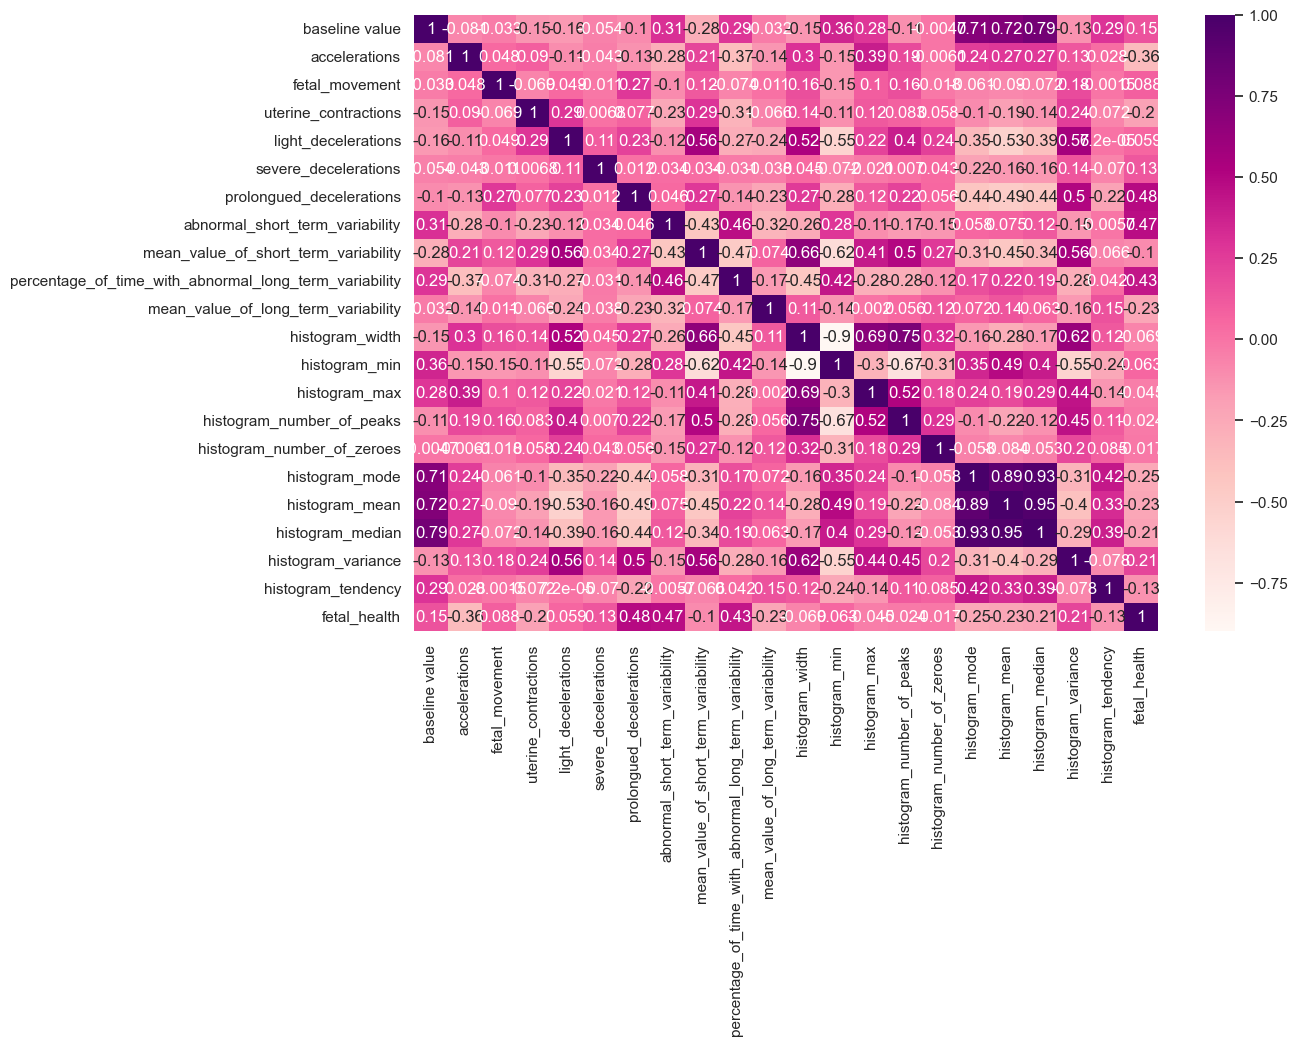

In [47]:
# generate heatmap to display correlations in data
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="RdPu");



Text(0.5, 1.0, 'Prolonged Decelerations and Fetal Health Outcomes')

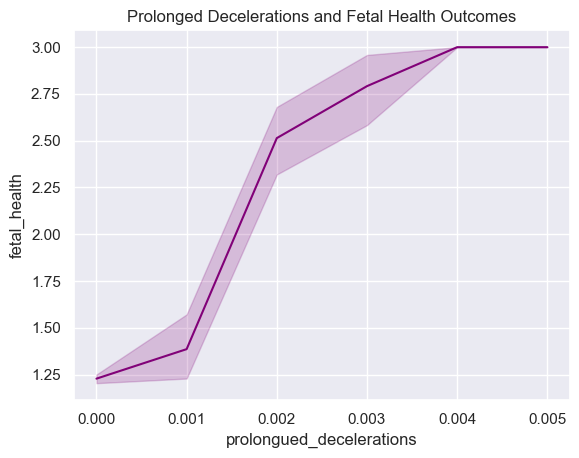

In [48]:
sns.set_palette(palette='RdPu_r')
sns.lineplot(x='prolongued_decelerations', y='fetal_health', data=df, alpha=1.0)
plt.title('Prolonged Decelerations and Fetal Health Outcomes')

C:\Users\Danvanth\AppData\Local\Temp\ipykernel_21964\510031269.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['baseline value'])


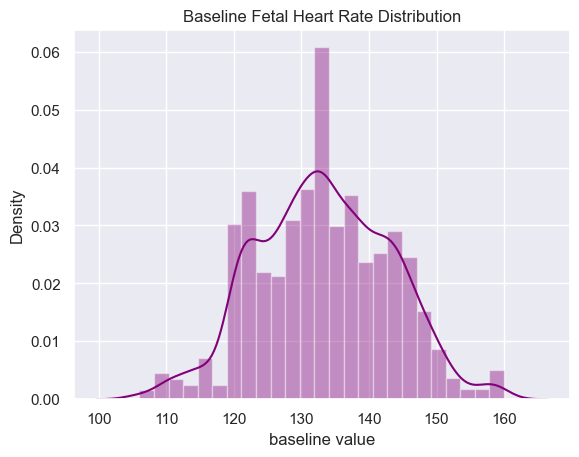

In [49]:
sns.set_palette(palette='RdPu_r')
sns.distplot(df['baseline value'])
plt.title('Baseline Fetal Heart Rate Distribution');


In [50]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

C:\Users\Danvanth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


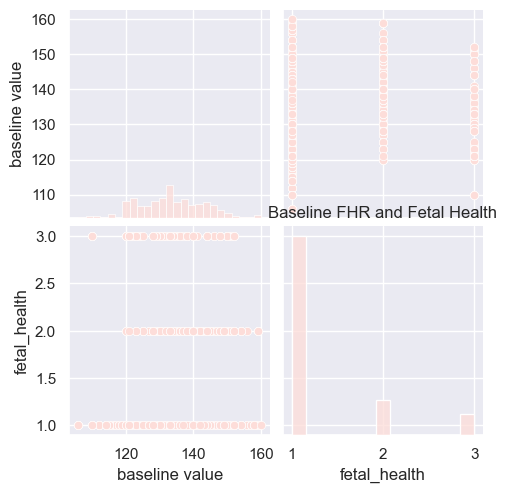

In [51]:
 sns.set_palette(palette='RdPu')
sns.pairplot(df[['baseline value', 'fetal_health']])
plt.title('Baseline FHR and Fetal Health');

In [52]:
df.columns


Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [53]:
histogram_columns = ['histogram_width',
 'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
 'histogram_median', 'histogram_variance', 'histogram_tendency']

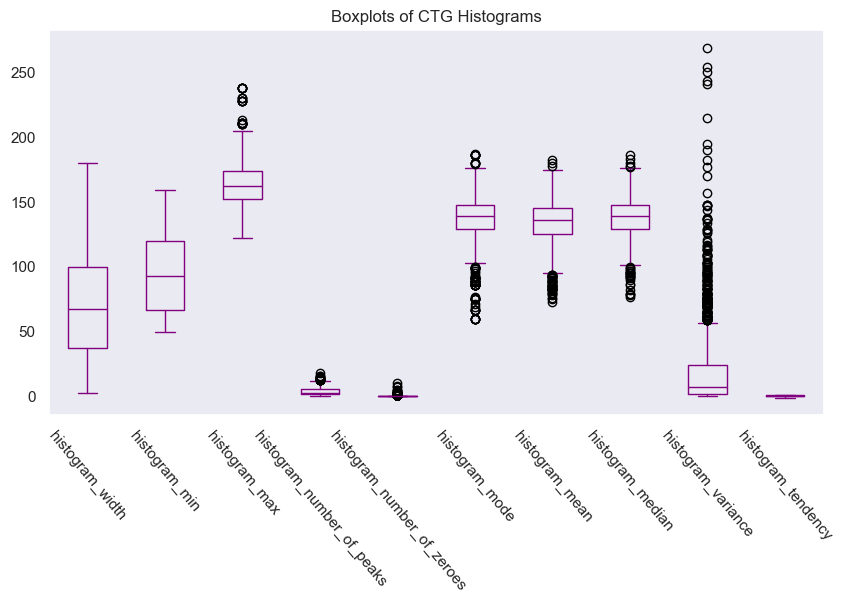

In [54]:
df[histogram_columns].plot(kind='box',grid=False, color='Purple', figsize=(10,5));
plt.xticks(rotation=(-50))
plt.title('Boxplots of CTG Histograms');

In [55]:
 # checking for null values
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [56]:
df.fetal_health.value_counts()

fetal_health
1    1655
2     295
3     176
Name: count, dtype: int64

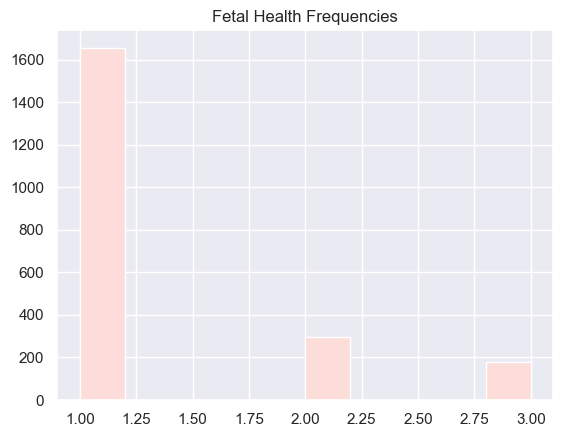

In [57]:
# plotting target variable frequencies
df.fetal_health.hist()
plt.title('Fetal Health Frequencies');


In [58]:
# engineering new categorical target column for Normal and At Risk fetal health
df.loc[df['fetal_health']==1.000, 'fh_outcome'] = 'Normal'
df.loc[df['fetal_health']==2.000, 'fh_outcome'] = 'At Risk'
df.loc[df['fetal_health']==3.000, 'fh_outcome'] = 'At Risk'

In [59]:
df = df.drop(columns='fetal_health', axis=1)

In [60]:
df.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome
0,120,0.000,0.000,0.000,0.000,0.000,0.000,73,0.500,43,...,62,126,2,0,120,137,121,73,1,At Risk
1,132,0.006,0.000,0.006,0.003,0.000,0.000,17,2.100,0,...,68,198,6,1,141,136,140,12,0,Normal
2,133,0.003,0.000,0.008,0.003,0.000,0.000,16,2.100,0,...,68,198,5,1,141,135,138,13,0,Normal
3,134,0.003,0.000,0.008,0.003,0.000,0.000,16,2.400,0,...,53,170,11,0,137,134,137,13,1,Normal
4,132,0.007,0.000,0.008,0.000,0.000,0.000,16,2.400,0,...,53,170,9,0,137,136,138,11,1,Normal


In [61]:
 df.fh_outcome.value_counts()


fh_outcome
Normal     1655
At Risk     471
Name: count, dtype: int64

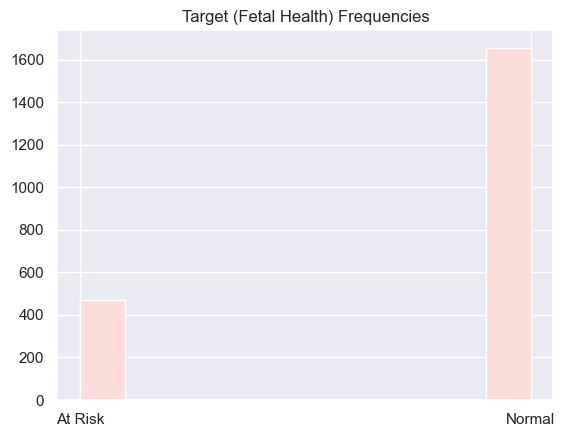

In [62]:
# plotting target frequencies
df.fh_outcome.hist()
plt.title('Target (Fetal Health) Frequencies');

In [63]:
df.dtypes


baseline value                                              int64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                             int64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability      int64
mean_value_of_long_term_variability                       float64
histogram_width                                             int64
histogram_min                                               int64
histogram_max                                               int64
histogram_number_of_peaks                                   int64
histogram_

In [64]:
df = pd.get_dummies(df, columns=['fh_outcome'])
df.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome_At Risk,fh_outcome_Normal
0,120,0.000,0.000,0.000,0.000,0.000,0.000,73,0.500,43,...,126,2,0,120,137,121,73,1,True,False
1,132,0.006,0.000,0.006,0.003,0.000,0.000,17,2.100,0,...,198,6,1,141,136,140,12,0,False,True
2,133,0.003,0.000,0.008,0.003,0.000,0.000,16,2.100,0,...,198,5,1,141,135,138,13,0,False,True
3,134,0.003,0.000,0.008,0.003,0.000,0.000,16,2.400,0,...,170,11,0,137,134,137,13,1,False,True
4,132,0.007,0.000,0.008,0.000,0.000,0.000,16,2.400,0,...,170,9,0,137,136,138,11,1,False,True


In [65]:
 df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fh_outcome_At Risk', 'fh_outcome_Normal'],
      dtype='object')

In [66]:
df = df.drop(columns=['fh_outcome_Normal'], axis=1)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome_At Risk
0,120,0.000,0.000,0.000,0.000,0.000,0.000,73,0.500,43,...,62,126,2,0,120,137,121,73,1,True
1,132,0.006,0.000,0.006,0.003,0.000,0.000,17,2.100,0,...,68,198,6,1,141,136,140,12,0,False
2,133,0.003,0.000,0.008,0.003,0.000,0.000,16,2.100,0,...,68,198,5,1,141,135,138,13,0,False
3,134,0.003,0.000,0.008,0.003,0.000,0.000,16,2.400,0,...,53,170,11,0,137,134,137,13,1,False
4,132,0.007,0.000,0.008,0.000,0.000,0.000,16,2.400,0,...,53,170,9,0,137,136,138,11,1,False


In [67]:
 df['fh_outcome_At Risk'].value_counts()


fh_outcome_At Risk
False    1655
True      471
Name: count, dtype: int64

In [68]:
df = df.rename(columns={'fh_outcome_At Risk':'target'})
df.target.value_counts()

target
False    1655
True      471
Name: count, dtype: int64

C:\Users\Danvanth\AppData\Local\Temp\ipykernel_21964\4277827574.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x="prolongued_decelerations", y="target",data=df, palette=color, legend="brief")


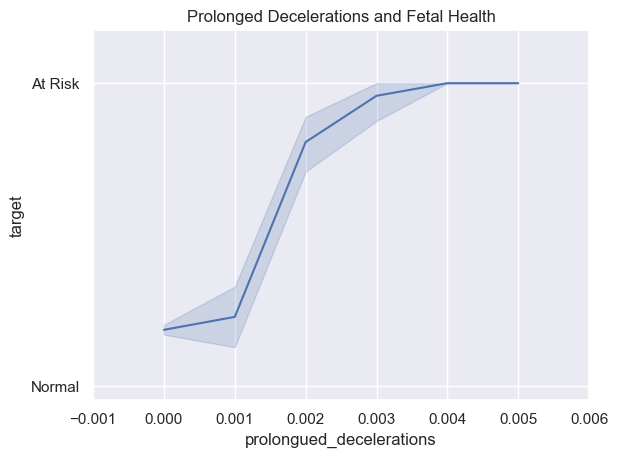

In [69]:
color = (sns.dark_palette("purple"))
sns.set()
ax = sns.lineplot(x="prolongued_decelerations", y="target",data=df, palette=color, legend="brief")
labels=['normal','At Risk']
y = [0,1]
labels = ['Normal', 'At Risk']
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('Prolonged Decelerations and Fetal Health')
plt.show()

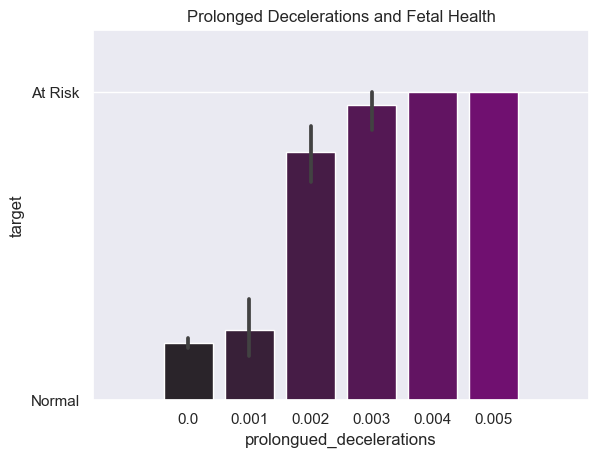

In [70]:
 color = (sns.dark_palette("purple"))
sns.set()
ax = sns.barplot(x="prolongued_decelerations", y="target",data=df, palette=color)
labels=['normal','At Risk']
y = [0,1]
labels = ['Normal', 'At Risk']
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('Prolonged Decelerations and Fetal Health')
plt.show()

C:\Users\Danvanth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


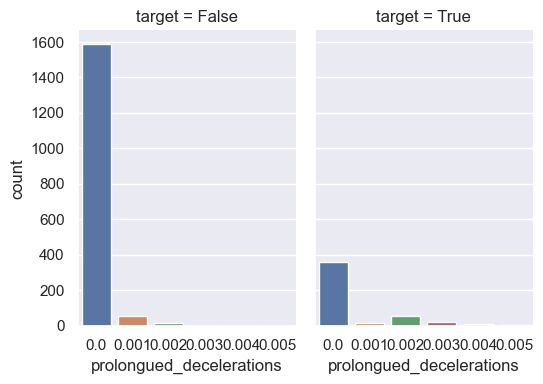

In [71]:
g = sns.catplot(x="prolongued_decelerations", col="target",
 data=df, kind="count",
 height=4, aspect=0.7)
#plt.title('Prolonged Deceleration by Fetal Health Outcome', pad=50, loc='right');

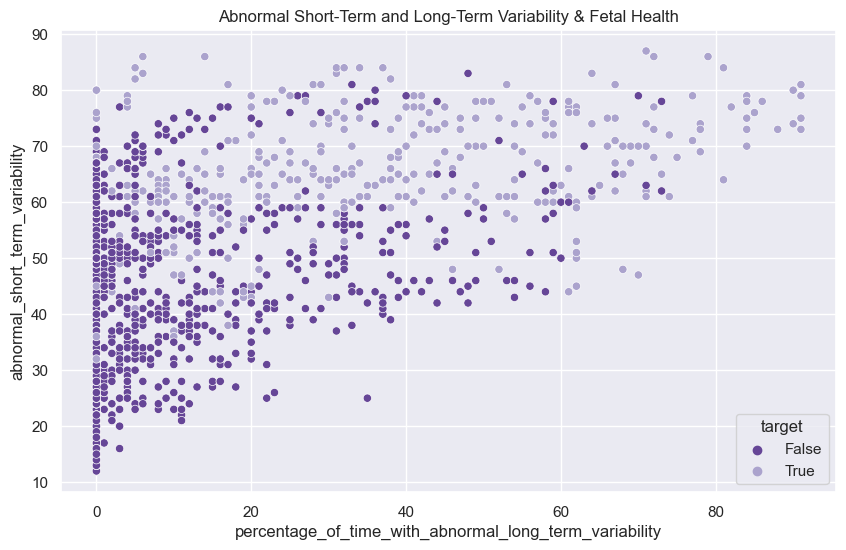

In [72]:
  # create scatter plot for samples from each class
sns.set_palette(palette='PuOr_r')
plt.figure(figsize=(10,6))
sns.scatterplot(x="percentage_of_time_with_abnormal_long_term_variability", y="abnormal_short_term_variability", hue='target', data=df)
plt.title('Abnormal Short-Term and Long-Term Variability & Fetal Health');


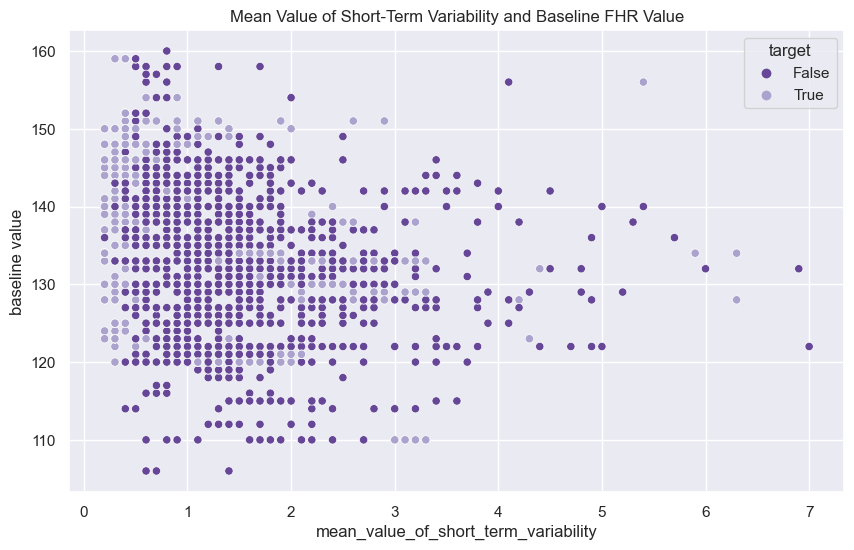

In [73]:
# create scatter plot for samples from each class
sns.set_palette(palette='PuOr_r')
plt.figure(figsize=(10,6))
sns.scatterplot(x="mean_value_of_short_term_variability", y="baseline value", hue='target', data=df)
plt.title('Mean Value of Short-Term Variability and Baseline FHR Value');

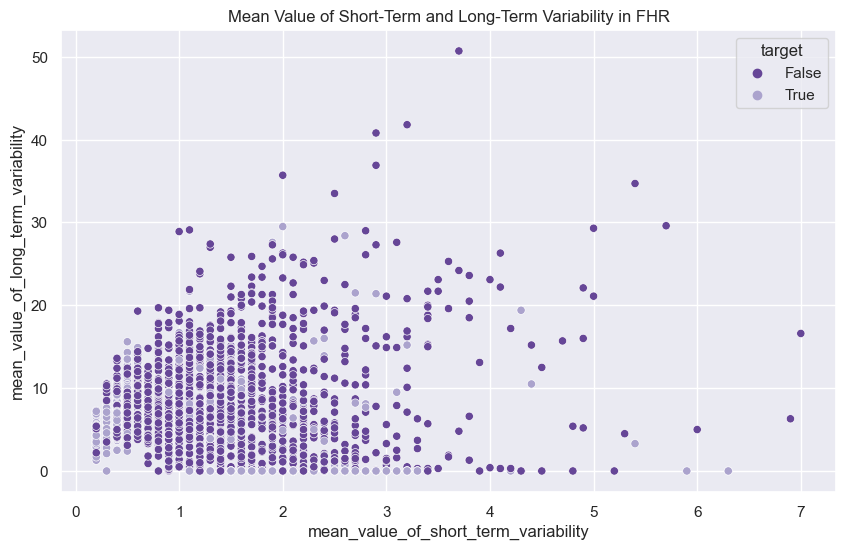

In [74]:
# create scatter plot for samples from each class
sns.set_palette(palette='PuOr_r')
plt.figure(figsize=(10,6))
sns.scatterplot(x="mean_value_of_short_term_variability", y="mean_value_of_long_term_variability", hue='target', data=df)
plt.title('Mean Value of Short-Term and Long-Term Variability in FHR');

In [75]:
# setting target and features
y = df['target']
X = df.drop(columns='target')
# splitting the data into train and test sets
# using stratify parameter to make sure class ratios 
# are distributed evenly across train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [76]:
# instantiating and fitting decision tree model
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [77]:
 y_pred = tree_clf.predict(X_test)
# confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Recall score: ',recall_score(y_test, y_pred))


[[484  13]
 [ 32 109]]
              precision    recall  f1-score   support

       False       0.94      0.97      0.96       497
        True       0.89      0.77      0.83       141

    accuracy                           0.93       638
   macro avg       0.92      0.87      0.89       638
weighted avg       0.93      0.93      0.93       638

Recall score:  0.7730496453900709


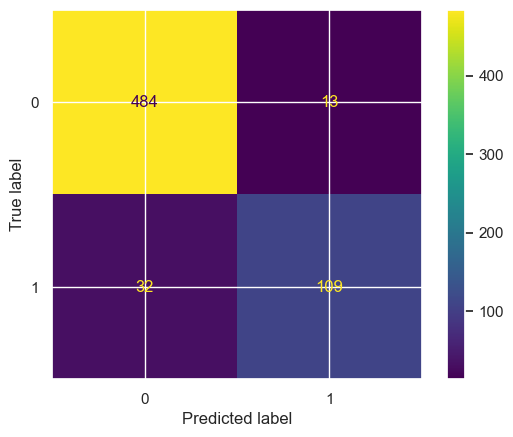

In [78]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
cm_display.plot()

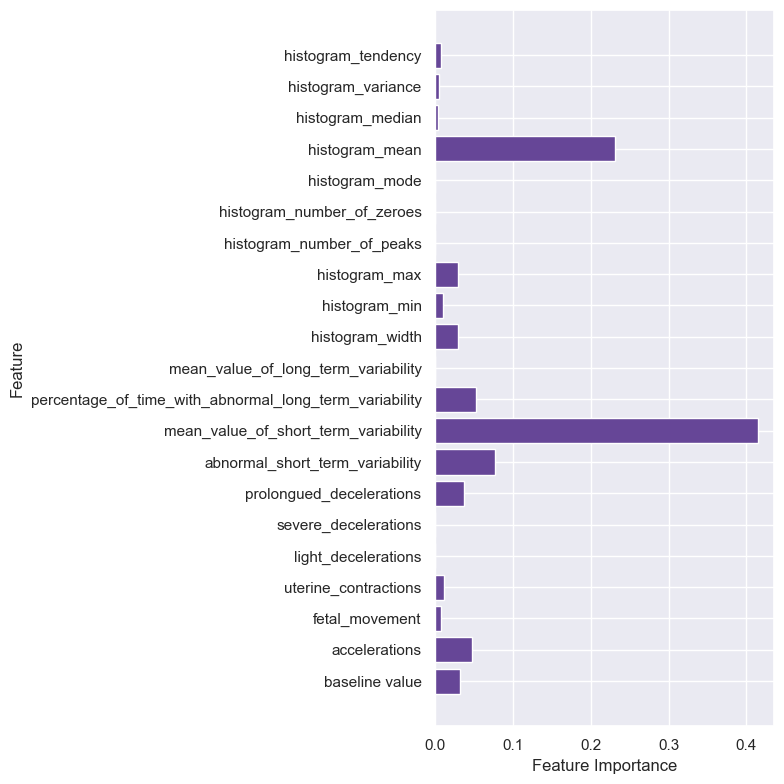

In [79]:
# plotting feature importances
def plot_feature_importances(model):
 n_features = X_train.shape[1]
 plt.figure(figsize=(8,8))
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), X_train.columns.values)
 plt.xlabel('Feature Importance')
 plt.ylabel('Feature')
plot_feature_importances(tree_clf)
plt.tight_layout()



In [80]:
# instantiating and fitting decision tree model
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, class_weight='balanced', random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [81]:
 y_pred = tree_clf.predict(X_test)
# confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Recall score: ',recall_score(y_test, y_pred))

[[463  34]
 [ 23 118]]
              precision    recall  f1-score   support

       False       0.95      0.93      0.94       497
        True       0.78      0.84      0.81       141

    accuracy                           0.91       638
   macro avg       0.86      0.88      0.87       638
weighted avg       0.91      0.91      0.91       638

Recall score:  0.8368794326241135


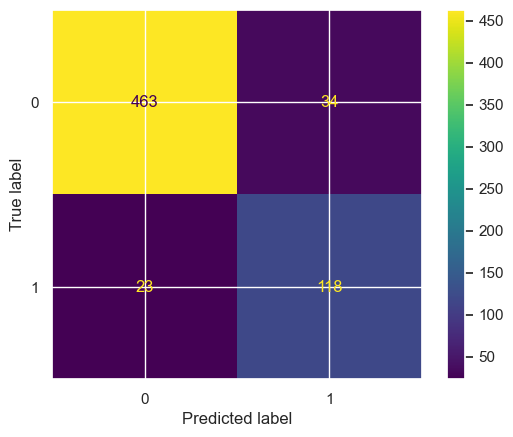

In [82]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
cm_display.plot()

In [83]:
# function to make a pipeline with classifier input
def pipe_maker(classifier):
 '''Takes in a classifier, returns a pipeline'''
 pipe = Pipeline([('scl', StandardScaler()),
 ('clf', classifier(class_weight= 'balanced', random_state=42))])
 return pipe


In [84]:
# function to create a grid search containing pipeline
def gridsearch_maker(pipeline, params):
 '''Takes in a pipeline and param grid, returns GridSearchCV object'''
 return GridSearchCV(estimator=pipeline,param_grid=params,scoring='recall',cv=10,n_jobs=-1)


In [85]:
# setting generic grid search parameters
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_small = [1.0, 0.5, 0.1]


In [86]:
def find_best_recall(gridsearch):
    # fitting the grid search objects
 best_recall = 0.0
 # fitting grid search
 gridsearch.fit(X_train, y_train)
 # best params
 print('Best params: %s' % gridsearch.best_params_)
 # best training data recall
 print('Best training recall: %.3f' % gridsearch.best_score_)
 # predict on test data with best params
 y_pred = gridsearch.predict(X_test)
 # test data recall with best params
 print('Test set recall score for best params: %.3f ' % recall_score(y_test, y_pred))
 # confusion matrix and classification report
 print(confusion_matrix(y_test, y_pred))
 print(classification_report(y_test, y_pred))
 print('Recall score: ',recall_score(y_test, y_pred))
 # plotting confusion matrix
 cm = confusion_matrix(y_test, y_pred)
 ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"]).plot(cmap='Blues')
 plt.show()


Best params: {'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training recall: 0.927
Test set recall score for best params: 0.922 
[[419  78]
 [ 11 130]]
              precision    recall  f1-score   support

       False       0.97      0.84      0.90       497
        True       0.62      0.92      0.74       141

    accuracy                           0.86       638
   macro avg       0.80      0.88      0.82       638
weighted avg       0.90      0.86      0.87       638

Recall score:  0.9219858156028369


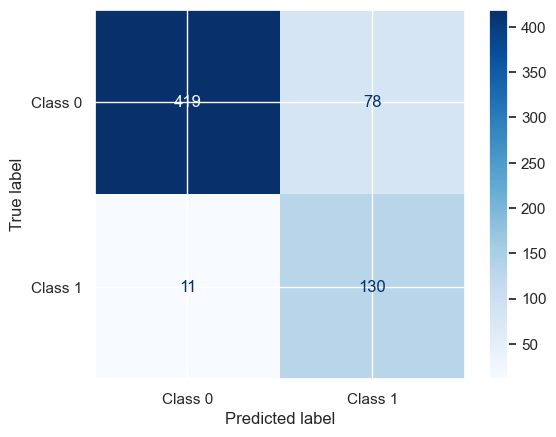

In [87]:
# fitting Logistic Regression pipeline
pipe_lr = pipe_maker(LogisticRegression)
# setting grid search parameters
grid_params_lr = [{'clf__penalty': ['l1', 'l2'],'clf__C': param_range_small,'clf__solver': ['liblinear']}]
# creating grid search object
gs_lr = gridsearch_maker(pipe_lr, grid_params_lr)
# finding best parameters for recall
find_best_recall(gs_lr)


In [88]:
Pkl_Filename = "dpp.pkl"  
pickle.dump(tree_clf, open(Pkl_Filename, 'wb'))

In [89]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [90]:
score = Pickled_LR_Model.score(X_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(X_test)  

Ypredict

Test score: 91.07 %


array([ True, False, False, False,  True, False, False, False,  True,
        True,  True, False, False,  True, False,  True, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False,  True,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False,  True, False, False, False, False,  True,
        True, False,

In [92]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 638 entries, 305 to 341
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          638 non-null    int64  
 1   accelerations                                           638 non-null    float64
 2   fetal_movement                                          638 non-null    float64
 3   uterine_contractions                                    638 non-null    float64
 4   light_decelerations                                     638 non-null    float64
 5   severe_decelerations                                    638 non-null    float64
 6   prolongued_decelerations                                638 non-null    float64
 7   abnormal_short_term_variability                         638 non-null    int64  
 8   mean_value_of_short_term_variability       